# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from PIL import Image
from waymo_open_dataset import dataset_pb2 as open_dataset
from utils import get_dataset, parse_frame, int64_feature, int64_list_feature, bytes_feature , bytes_list_feature, float_list_feature

import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import numpy as np
import tensorflow as tf


%matplotlib inline

ImportError: cannot import name 'dataset_pb2' from 'waymo_open_dataset' (/home/lrjoly/UDACITY/machine_learning/project/waymo-open-dataset/waymo_open_dataset/__init__.py)

In [2]:
dataset = get_dataset("data/test/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['data/test/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/test/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 3
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


2023-01-16 10:38:02.792887: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-16 10:38:02.800993: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-16 10:38:02.801316: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-16 10:38:02.801875: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [3]:


def display_images(batch,img_filename):

    # figure container
    f, ax = plt.subplots(2, 5, figsize=(20, 10))
    # color mapping of classes
    colormap = {1: [1, 0, 0], 2: [0, 1, 0], 4: [0, 0, 1]}

    for idx, data in enumerate(batch):
        # subplot indexes
        x = idx % 2
        y = idx % 5
        # image shape
        width = data['image'].shape[0]
        height = data['image'].shape[0]
        # get image
        img = data['image']
        # plot image
        ax[x,y].imshow(img)
        # plot bouding boxes et classes
        bboxes = data['groundtruth_boxes']
        classes = data['groundtruth_classes']
        for cl, bb in zip(classes, bboxes):
            # get box position
            y1, x1, y2, x2 = bb.numpy() * 640
            # draw box
            rec = Rectangle((x1, y1), x2-x1, y2-y1, facecolor='none', 
                             edgecolor=colormap[cl.numpy()])
            # add it to the subplot
            ax[x,y].add_patch(rec)
            ax[x,y].set_axis_off()
    
    plt.tight_layout()        
    plt.savefig(img_filename)
    plt.show()
    

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

In [3]:
dataset = dataset.shuffle(10000)
batch = dataset.take(10)
# command to display images in the cell below

In [ ]:
display_images(batch,'discover_test_01.png')

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

2023-01-16 10:38:23.006004: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


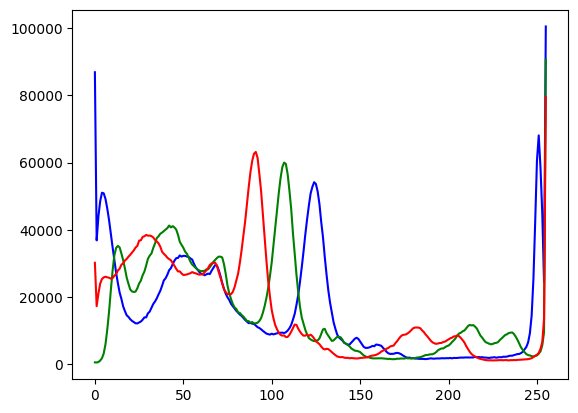

In [4]:
red = np.zeros((256,1), dtype = np.uint64)
green = np.zeros((256,1), dtype = np.uint64)
blue = np.zeros((256,1), dtype = np.uint64)

for idx, data in enumerate(batch):
    w = data['image'].shape[0]
    h = data['image'].shape[1]

    img = data['image'].numpy()

    h, w, cc = img.shape
    for x in range(0,w):
        for y in range(0,h):
            blue[img[y,x,2]] += 1 
            green[img[y,x,1]] += 1 
            red[img[y,x,0]] += 1 
plt.figure()
plt.plot(range(256), blue, color='b')
plt.plot(range(256), green, color='g')
plt.plot(range(256), red, color='r')
plt.savefig("color_hist_test.png")
plt.show()


In [ ]:
tfrecord_list = glob.glob("data/train/*.tfrecord")

# counter container
vehicle_counter = 0
pedestrian_counter = 0
cyclist_counter = 0

# LOOP
for idx, record in enumerate(tfrecord_list):
    print(record)
    dataset = get_dataset(record)
    # Extract data
    for idy, data in enumerate(dataset):
        if (idy < 100000):
            if (idy == (idy // 50000)*50000):
                print("read dataset " + str(idy))
            classes = data['groundtruth_classes'].numpy()
            # update classes counter
            vehicle_counter += np.count_nonzero(classes == 1)
            pedestrian_counter += np.count_nonzero(classes == 2)
            cyclist_counter += np.count_nonzero(classes == 4)
        else:
            break
# plot data
classes_count = {'vehicle': vehicle_counter, 'pedestrian': pedestrian_counter, 'cyclist': cyclist_counter}
X = np.arange(len(classes_count))
ax = plt.subplot(111)
ax.bar(X, classes_count.values(), width=0.7, align='center')
plt.xticks(X, classes_count.keys())
plt.title("Class detection count - train dataset", fontsize=7)
plt.savefig("train_classes.png")
plt.show()

data/train/segment-10975280749486260148_940_000_960_000_with_camera_labels.tfrecord
INFO:tensorflow:Reading unweighted datasets: ['data/train/segment-10975280749486260148_940_000_960_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/train/segment-10975280749486260148_940_000_960_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


2023-01-16 11:54:24.630765: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-16 11:54:24.635514: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-16 11:54:24.635692: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-16 11:54:24.636412: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

read dataset 0
read dataset 50000
read dataset 100000
read dataset 150000
read dataset 200000
read dataset 250000
read dataset 300000
read dataset 350000
read dataset 400000
read dataset 450000
data/train/segment-10786629299947667143_3440_000_3460_000_with_camera_labels.tfrecord
INFO:tensorflow:Reading unweighted datasets: ['data/train/segment-10786629299947667143_3440_000_3460_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/train/segment-10786629299947667143_3440_000_3460_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
read dataset 0
read dataset 50000
read dataset 100000
read dataset 150000
read dataset 200000
read dataset 250000
read dataset 300000
read dataset 350000
read dataset 400000
read dataset 450000
data/train/segment-11004685739714500220_2300_000_2320_000_with_camera_labels.tfrecord
INFO:tensorflow:Reading unweighted datasets: ['data/train/segment-11004685739714500220_2300_000_2320_000_with_ca

read dataset 0
read dataset 50000
read dataset 100000
read dataset 150000
read dataset 200000
read dataset 250000
read dataset 300000
read dataset 350000
read dataset 400000
read dataset 450000
data/train/segment-11847506886204460250_1640_000_1660_000_with_camera_labels.tfrecord
INFO:tensorflow:Reading unweighted datasets: ['data/train/segment-11847506886204460250_1640_000_1660_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/train/segment-11847506886204460250_1640_000_1660_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
read dataset 0
read dataset 50000
read dataset 100000
read dataset 150000
read dataset 200000
read dataset 250000
read dataset 300000
read dataset 350000
read dataset 400000


data/val/segment-12161824480686739258_1813_380_1833_380_with_camera_labels.tfrecord


2023-01-16 12:41:33.626766: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-16 12:41:33.631593: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-16 12:41:33.631771: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-16 12:41:33.632967: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

INFO:tensorflow:Reading unweighted datasets: ['data/val/segment-12161824480686739258_1813_380_1833_380_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/val/segment-12161824480686739258_1813_380_1833_380_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


2023-01-16 12:41:33.633726: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-16 12:41:33.633935: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-16 12:41:33.634097: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-16 12:41:34.112543: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-16 12:41:34.112737: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

read dataset 0
read dataset 50000
read dataset 100000
read dataset 150000
read dataset 200000
read dataset 250000
read dataset 300000
read dataset 350000
read dataset 400000
read dataset 450000
data/val/segment-11967272535264406807_580_000_600_000_with_camera_labels.tfrecord
INFO:tensorflow:Reading unweighted datasets: ['data/val/segment-11967272535264406807_580_000_600_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['data/val/segment-11967272535264406807_580_000_600_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1
read dataset 0
read dataset 50000
read dataset 100000
read dataset 150000
read dataset 200000
read dataset 250000
read dataset 300000
read dataset 350000
read dataset 400000
read dataset 450000
data/val/segment-11918003324473417938_1400_000_1420_000_with_camera_labels.tfrecord
INFO:tensorflow:Reading unweighted datasets: ['data/val/segment-11918003324473417938_1400_000_1420_000_with_camera_labels.tfre

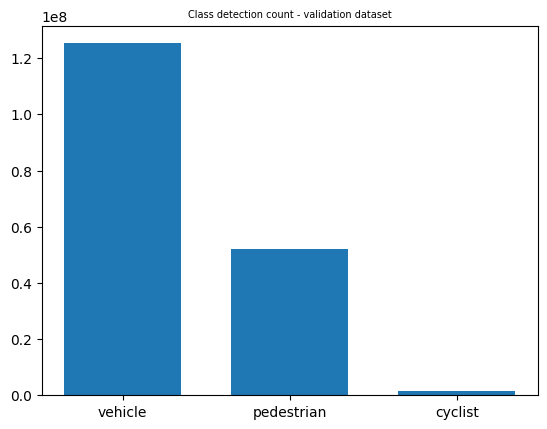

In [2]:
tfrecord_list = glob.glob("data/val/*.tfrecord")

# counter container
vehicle_counter = 0
pedestrian_counter = 0
cyclist_counter = 0

# LOOP
for idx, record in enumerate(tfrecord_list):
    print(record)
    dataset = get_dataset(record)
    # Extract data
    for idy, data in enumerate(dataset):
        if (idy < 500000):
            if (idy == (idy // 50000)*50000):
                print("read dataset " + str(idy))
            classes = data['groundtruth_classes'].numpy()
            # update classes counter
            vehicle_counter += np.count_nonzero(classes == 1)
            pedestrian_counter += np.count_nonzero(classes == 2)
            cyclist_counter += np.count_nonzero(classes == 4)
        else:
            break
# plot data
classes_count = {'vehicle': vehicle_counter, 'pedestrian': pedestrian_counter, 'cyclist': cyclist_counter}
X = np.arange(len(classes_count))
ax = plt.subplot(111)
ax.bar(X, classes_count.values(), width=0.7, align='center')
plt.xticks(X, classes_count.keys())
plt.title("Class detection count - validation dataset", fontsize=7)
plt.savefig("val_classes.png")
plt.show()